# Guided Project: Finding Heavy Traffic Indicators on I-94

The goal of the analysis is to determine a few indiciators of heavy traffic on I-94. More specifically, westbound traffic from Saint Paul to Minneapolis . These indicators can be weather type, time of day, time of the week, etc. For instnace, we may find out that traffic the traffic is usually heavier in the summer or when it snows.

In [1]:
import pandas as pd
I_94 = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [2]:
I_94.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


traffic_volume variable:

The number represents the amount of cars passing a station each hour. This station recorded the traffic data. 

In [3]:
I_94.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [4]:
I_94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


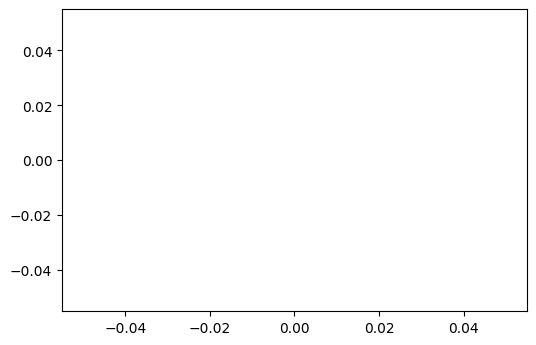

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot()
plt.show()

In [6]:
I_94.traffic_volume.describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [7]:
I_94.traffic_volume.value_counts()

356     50
353     50
340     47
351     44
369     42
        ..
5091     1
2156     1
2252     1
205      1
7150     1
Name: traffic_volume, Length: 6704, dtype: int64

(array([8089., 5102., 2839., 4753., 4770., 4342., 7888., 5636., 3857.,
         928.]),
 array([   0.,  728., 1456., 2184., 2912., 3640., 4368., 5096., 5824.,
        6552., 7280.]),
 <a list of 10 Patch objects>)

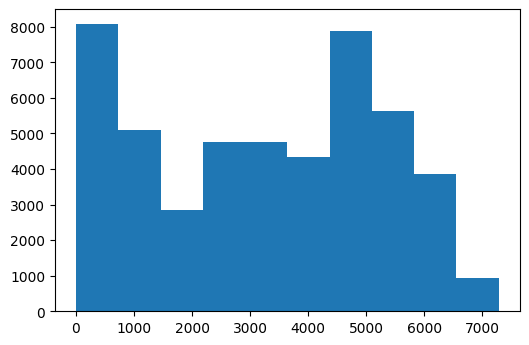

In [8]:
plt.hist(I_94.traffic_volume)

For the purposes of this excercise: 
    
- Daytime: 7am - 7pm
- Nighttime: 7pm - 7am

In [9]:
I_94.date_time = pd.to_datetime(I_94.date_time)

In [10]:
hours = I_94.date_time.dt.hour 

In [11]:
hours.value_counts().sort_index()

0     2037
1     2049
2     2019
3     2025
4     2091
5     2063
6     2087
7     2079
8     2080
9     2018
10    2078
11    1952
12    1955
13    1905
14    1969
15    1934
16    1988
17    1933
18    1986
19    1961
20    1979
21    1982
22    1994
23    2040
Name: date_time, dtype: int64

In [12]:
day_data = I_94.copy()[(I_94['date_time'].dt.hour >= 6) & 
                (I_94['date_time'].dt.hour <= 18)]
night_data = I_94.copy()[(I_94['date_time'].dt.hour <= 6) | 
                (I_94['date_time'].dt.hour >= 18)]

In [13]:
day_data.shape

(25964, 9)

In [14]:
night_data.shape

(26313, 9)

In [15]:
night_data.date_time.dt.hour

9        18
10       19
11       20
12       21
13       22
         ..
48199    19
48200    20
48201    21
48202    22
48203    23
Name: date_time, Length: 26313, dtype: int64

In [16]:
day_data.date_time.dt.hour

0         9
1        10
2        11
3        12
4        13
         ..
48194    15
48195    15
48196    16
48197    17
48198    18
Name: date_time, Length: 25964, dtype: int64

(array([7154., 4988., 1957., 2377., 4434., 2138., 1000.,  937.,  893.,
         435.]),
 array([   0. ,  638.6, 1277.2, 1915.8, 2554.4, 3193. , 3831.6, 4470.2,
        5108.8, 5747.4, 6386. ]),
 <a list of 10 Patch objects>)

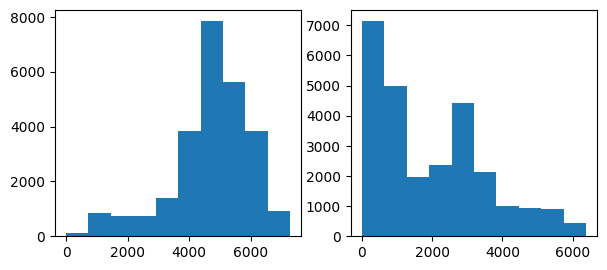

In [17]:
plt.figure(figsize =(7,3))
plt.subplot(1, 2, 1)
plt.hist(day_data['traffic_volume'])
plt.subplot(1, 2, 2)
plt.hist(night_data['traffic_volume'])

### Analysis of the above:

It appears during the hours from 7am to 7pm, the traffic volume; i.e., the number of cars passing the station each hour, occurs in the 4500 - 5000 range.

From the hours 7pm to 7am, it appears the numbers of cars passing the station most often is between 0-500. 

### Question asked by the Guided Project

If the traffic is light at night, and our goal is to find indicators of heavy traffic, should we still be using the nighttime data?

To get a clearer look, we look at the percentage distribution of traffic volume for both the day and night data below.

In [18]:
night_data.traffic_volume.value_counts(bins = 10, normalize = True).sort_index()

(-6.3870000000000005, 638.6]    0.271881
(638.6, 1277.2]                 0.189564
(1277.2, 1915.8]                0.074374
(1915.8, 2554.4]                0.090336
(2554.4, 3193.0]                0.168928
(3193.0, 3831.6]                0.080835
(3831.6, 4470.2]                0.038004
(4470.2, 5108.8]                0.035610
(5108.8, 5747.4]                0.033938
(5747.4, 6386.0]                0.016532
Name: traffic_volume, dtype: float64

It turns out that the traffic volume for over 50% of the night hours dataset occurs under the 2000 range. 

In [19]:
day_data.traffic_volume.value_counts(bins = 10, normalize = True).sort_index()

(-7.281000000000001, 728.0]    0.003929
(728.0, 1456.0]                0.033392
(1456.0, 2184.0]               0.028848
(2184.0, 2912.0]               0.027962
(2912.0, 3640.0]               0.053959
(3640.0, 4368.0]               0.147974
(4368.0, 5096.0]               0.302881
(5096.0, 5824.0]               0.216993
(5824.0, 6552.0]               0.148436
(6552.0, 7280.0]               0.035626
Name: traffic_volume, dtype: float64

While for the day hours dataset, over 50% of the cars passing the station occur between the 4368-5824 range.

In other words, 50% of the time, there are between 4368-5824 during the hours from 7am to 7pm.

In answer of the above question, "If the traffic is light at night, and our goal is to find indicators of heavy traffic, should we still be using the nighttime data?"

In [20]:
day_data['month'] = day_data['date_time'].dt.month

In [21]:
day_data.month.value_counts().sort_index()

1     2158
2     1881
3     2016
4     2252
5     2398
6     2065
7     2595
8     2363
9     2026
10    1888
11    1977
12    2345
Name: month, dtype: int64

In [22]:
by_month = day_data.groupby('month').mean()
by_month['traffic_volume']

month
1     4454.437905
2     4668.720893
3     4808.595238
4     4855.753996
5     4864.847373
6     4844.947215
7     4548.161464
8     4880.405840
9     4822.254195
10    4885.176377
11    4655.133030
12    4315.102345
Name: traffic_volume, dtype: float64

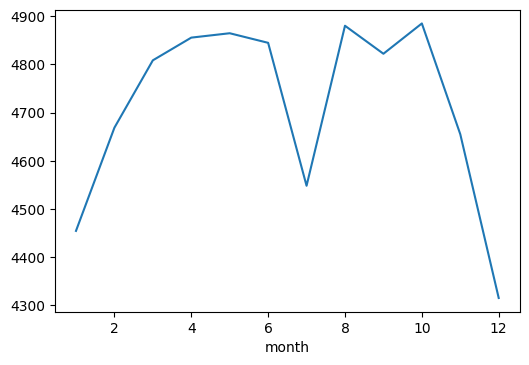

In [24]:
by_month['traffic_volume'].plot.line()
plt.show()

### Analysis of the above

You may have been able to make an analysis that the temperature had an impact on traffic volume, and that less cars drove during the colder months than in the warmer ones. However, In July, it dips to March levels. 

There could be many reasons why July dipped. One reason was that the weather was too hot during July this year. Another is that people were traveling more and away from their homes. 

In [32]:
day_data['dayofweek'] = day_data['date_time'].dt.dayofweek
by_dayofweek = day_data.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']

dayofweek
0    4909.070198
1    5214.632228
2    5305.494133
3    5325.301445
4    5283.891671
5    3723.530435
6    3222.410782
Name: traffic_volume, dtype: float64

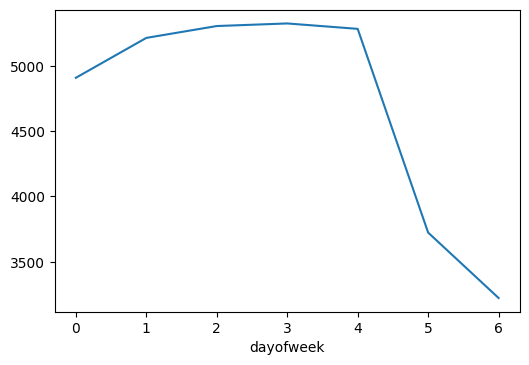

In [33]:
by_dayofweek['traffic_volume'].plot.line()
plt.show()

Based on the plot above, we see that on the weekends, the traffic is lower. 

In [34]:
day_data['hour'] = day_data['date_time'].dt.hour

In [92]:
day_data['weekend'] = day_data['dayofweek'] >= 5
day_data['weekday'] = day_data['dayofweek'] <= 4
weekend = day_data[day_data['weekend']]
weekday = day_data[day_data['weekday']]
weekend_hours = weekend.groupby('hour').mean()
weekend_hours

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,dayofweek,weekend,weekday
hour,,,,,,,,,
6,278.115656,0.270134,0.000000,44.491639,1089.100334,6.533445,5.521739,True,False
7,278.095331,0.291540,0.000000,50.006623,1589.365894,6.518212,5.501656,True,False
8,277.981017,0.083870,0.000083,48.877076,2338.578073,6.523256,5.503322,True,False
9,279.785660,0.075234,0.000364,49.688042,3111.623917,6.603120,5.492201,True,False
10,280.403811,0.079674,0.000103,48.915808,3686.632302,6.491409,5.503436,True,False
11,282.129355,0.141387,0.000000,52.372973,4044.154955,6.482883,5.491892,True,False
12,282.936119,0.095784,0.000000,51.418018,4372.482883,6.500901,5.493694,True,False
13,283.784951,0.180452,0.000000,53.095841,4362.296564,6.580470,5.497288,True,False
14,284.663261,0.087847,0.000000,52.735401,4358.543796,6.644161,5.500000,True,False


In [68]:
weekday_hours = weekday.groupby('hour').mean()
weekday_hours

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,dayofweek,weekend,weekday
hour,,,,,,,,,
6,278.432872,0.164433,0.000067,45.685695,5365.983210,6.573539,1.997314,False,True
7,278.662639,0.145105,0.000068,50.538983,6030.413559,6.363390,1.984407,False,True
8,278.938443,0.144614,0.000135,53.666441,5503.497970,6.567659,1.989175,False,True
9,279.628421,0.156829,0.000139,53.619709,4895.269257,6.484386,1.981263,False,True
10,280.664650,0.113984,0.000033,54.781417,4378.419118,6.481283,1.957888,False,True
11,281.850231,0.151976,0.000000,52.808876,4633.419470,6.448819,1.979957,False,True
12,282.832763,0.090271,0.001543,53.855714,4855.382143,6.569286,1.989286,False,True
13,283.292447,0.092433,0.000370,53.325444,4859.180473,6.465237,1.982988,False,True
14,284.091787,0.102991,0.000746,55.326531,5152.995778,6.588318,1.990852,False,True


Text(0.5, 1.0, 'Weekend Traffic Volume by Hour')

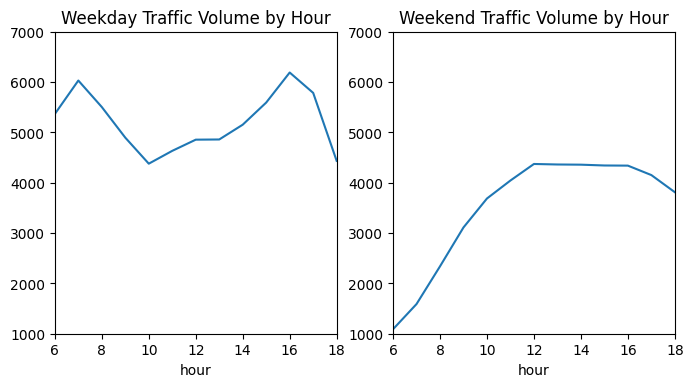

In [89]:
plt.figure(figsize = (8, 4))
plt.subplot(1, 2, 1)
weekday_data['traffic_volume'].plot.line()
plt.xlim(6, 18)
plt.ylim(1000, 7000)
plt.title('Weekday Traffic Volume by Hour')

plt.subplot(1, 2, 2)
weekend_data['traffic_volume'].plot.line()
plt.xlim(6, 18)
plt.ylim(1000, 7000)
plt.title('Weekend Traffic Volume by Hour')

### Analysis of the above

On weekdays, traffic is at one of it's highest points at 8am, potentially when people are going to work, school, etc. Volumes then decrease to the low for the day at 11am. They slowly increase and do not reach 8am levels until around 4pm, where the ultimate peak levels occur for the day. This is potentially when school ends and traffic picks up, especially if there are busses being used, kids are going to after school activities, etc. 

On weekends, traffic is at it's lowest at the start of the plot, 7am. It then rises by about from 500-800 cars per hour from 7am to 11am, and then 300-400 from 11am to 1pm. It then peaks at 4372 automobiles passing the station per hour at 1pm, and slowly declines by about 10 cars pers hour until 5. The drop off then occurs from 5-6, where it drops by around 200 cars per hour, and then lastly from 6-7 where it drops around 300 cars per hour. 

In [99]:
weekend_hours['traffic_volume']

hour
6     1089.100334
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64

In [100]:
weekday_hours['traffic_volume']

hour
6     5365.983210
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64

In [107]:
day_data['traffic_volume'].corr(day_data['temp'])

0.0033204794231540343

In [109]:
day_data['traffic_volume'].corr(day_data['rain_1h'])

0.0033204794231540343

In [110]:
day_data['traffic_volume'].corr(day_data['snow_1h'])

0.0017745952971162501

In [115]:
day_data['traffic_volume'].corr(day_data['clouds_all'])

-0.022064197982817387

None of the above correlations look very strong 

In [117]:
day_data.corr()['traffic_volume']

temp              0.126774
rain_1h           0.003320
snow_1h           0.001775
clouds_all       -0.022064
traffic_volume    1.000000
month            -0.020242
dayofweek        -0.447838
hour              0.195676
weekend          -0.610359
weekday           0.610359
Name: traffic_volume, dtype: float64

In [121]:
by_weather_main = day_data.groupby('weather_main').mean()
by_weather_description = day_data.groupby('weather_description').mean()

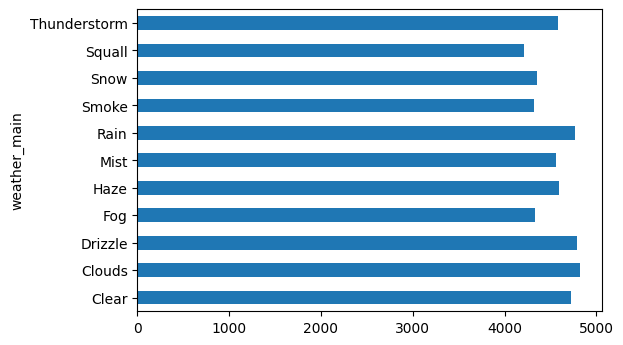

In [123]:
by_weather_main['traffic_volume'].plot.barh()

In [124]:
by_weather_main['traffic_volume']

weather_main
Clear           4722.645962
Clouds          4825.436729
Drizzle         4791.208589
Fog             4331.733333
Haze            4594.139932
Mist            4558.200401
Rain            4771.561892
Smoke           4317.076923
Snow            4358.179975
Squall          4211.000000
Thunderstorm    4579.394790
Name: traffic_volume, dtype: float64

It looks like Fog, Smoke, Snow, and Sqall are the only weather types that correlate to a traffic volume dip below 4558.

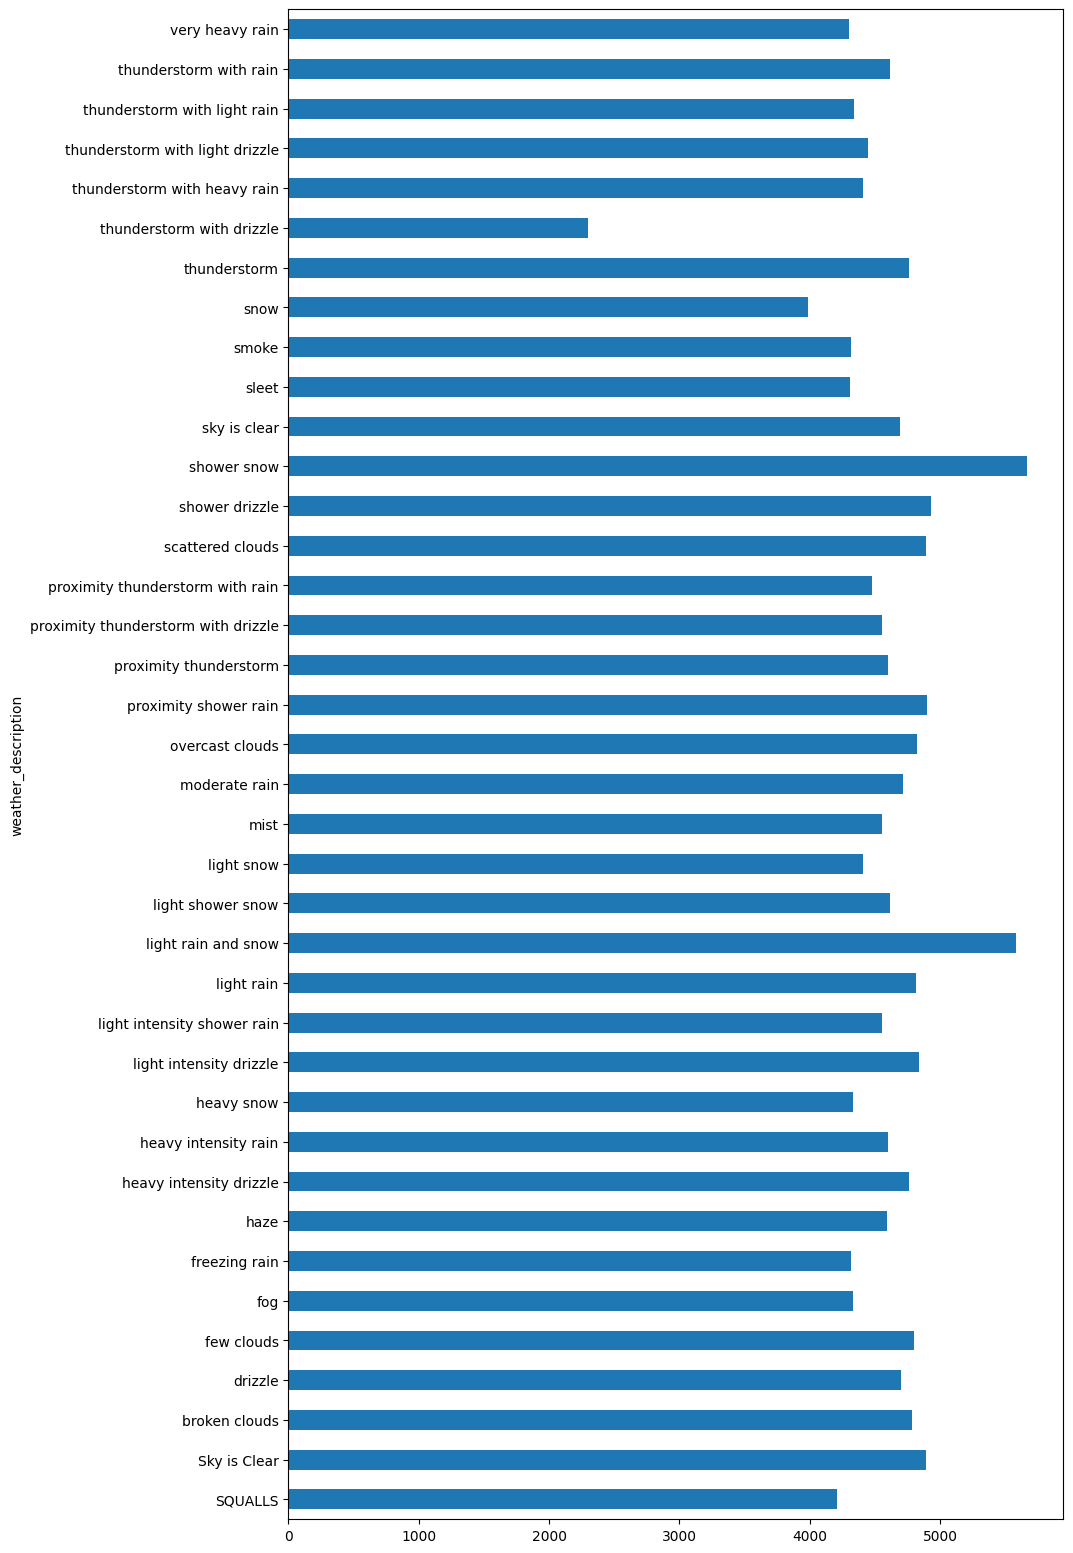

In [136]:
by_weather_description['traffic_volume'].plot.barh(figsize = (10, 20))

In [139]:
by_weather_description['traffic_volume']

weather_description
SQUALLS                                4211.000000
Sky is Clear                           4892.837460
broken clouds                          4787.476860
drizzle                                4704.367089
few clouds                             4800.981605
fog                                    4331.733333
freezing rain                          4314.000000
haze                                   4594.139932
heavy intensity drizzle                4760.666667
heavy intensity rain                   4601.644898
heavy snow                             4332.738372
light intensity drizzle                4836.340289
light intensity shower rain            4558.100000
light rain                             4814.470908
light rain and snow                    5579.750000
light shower snow                      4618.636364
light snow                             4409.314607
mist                                   4558.200401
moderate rain                          4719.975890
overcast cl

### Analysis of the above

It's a bit odd, you might think, that the traffic volumes are highest during the weather descriptions 'light rain and snow' (5579), 'shower snow' (5664), and shower drizzle (4932). However, there could be many reasons as to why traffic volumes are highest during these points.

They are lowest during 'thunderstorm with drizzle' (2297), and 'SQUALLS' (4211). 

There are many ways we could go into interpretation here. We could look at the months, days of the week, or hours of the day when these occured. Maybe they happened to occur on specific days, such as a business day, where people could not avoid the weather.

Maybe the weather forecast of shower snow was actually a lot more timid than we realize. It's very ambigious and hard to draw conclusions. We can continue to dive into the dataset and answer other questions, or try to analyze the weather further. However, I will be moving on to more data analysis so I can pick up more coding skills.